# Lab|EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.sample(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
900668,979930,B0C4XY1S72,Tank Tops Men Summer Beach Hawaiian Printed Le...,0.0,0,5.79,False,0,Sports & Outdoors
126098,136453,B09Q1JW4KL,"Personalised Family Print with pets gift, Cust...",0.0,0,12.99,False,0,Handmade Gifts
860176,936351,B08ZXZ1L4C,Waveshare 2.13inch E-Paper E-Ink Display Modul...,5.0,1,19.99,False,0,Monitors


In [3]:
df.shape

(2443651, 9)

## Part 1: Understanding Product Categories

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### 1. Frequency Tables:

In [4]:
# frequency table for the product category.
frequency_table = df.category.value_counts()
pd.DataFrame(frequency_table)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Alexa Built-In Devices,107
Motorbike Chassis,107
Plugs,107


In [5]:
# top 5 most listed product categories
top_five = frequency_table.head(5)
print (f"Top 5 most listed product categories are:\n\n{top_five}")

Top 5 most listed product categories are:

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


 ### 2. Visualizations:

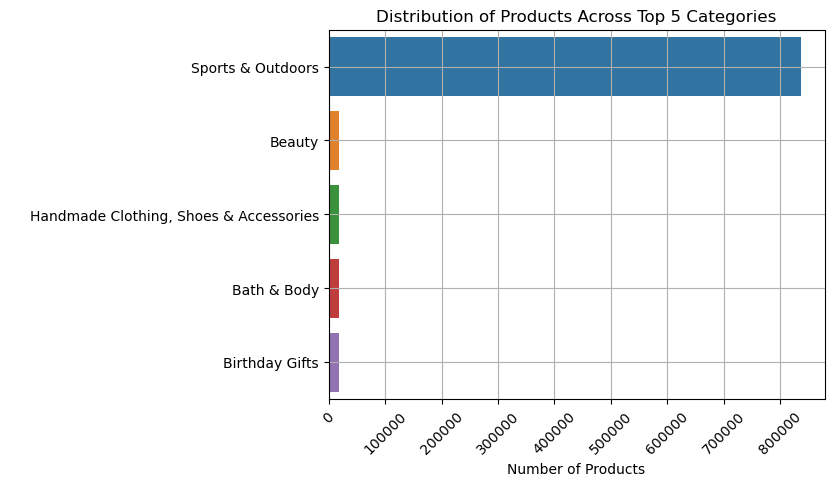

In [6]:
#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(y=top_five.index, x=top_five.values)
plt.title('Distribution of Products Across Top 5 Categories')
plt.ylabel(' ')
plt.xlabel('Number of Products')
plt.xticks(rotation=45)
plt.grid()
plt.show()

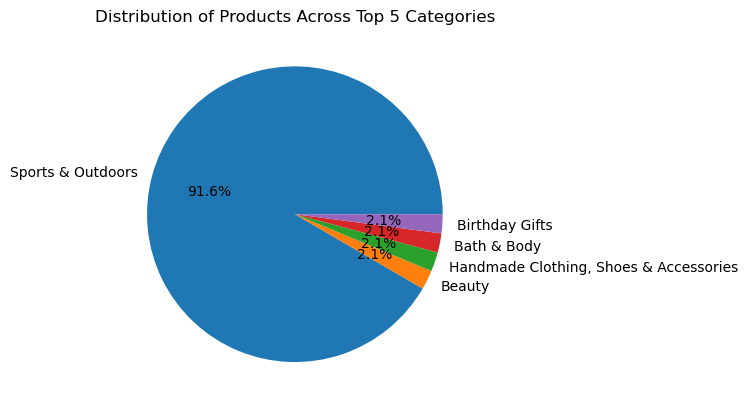

In [7]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
top_five.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Products Across Top 5 Categories')
plt.ylabel('')
plt.show()

## Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. Measures of Centrality:

In [8]:
# Calculate the mean, median, and mode for the price of products.
print("Price of the products:\n")
print(f"Mean: {round(df.price.mean(),4)}")
print(f"Median: {round(df.price.median(),4)}")
print(f"Mode: {round(df.price.mode(),4)}")

Price of the products:

Mean: 89.2438
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64


In [9]:
# What's the average price point of products listed? 
# How does this compare with the most common price point (mode)?

The average price (89.2438) is extremely greater than most common price (9.99) which indicates that there are likely higher-priced items that contribute to an overall higher average. 

### 2. Measures of Dispersion:

In [10]:
# Determine the variance, standard deviation, range, and interquartile range for product price.

In [11]:
print("Price of the products:\n")
print(f"Variance: {round(df.price.var(),2)}")
print(f"Standard deviation: {round(df.price.std(),2)}")
print(f"Range: {df.price.min()} - {df.price.max()}")
print(f"Interquantile Range: {df.price.quantile(0.75)-df.price.quantile(0.25)}")

Price of the products:

Variance: 119445.49
Standard deviation: 345.61
Range: 0.0 - 100000.0
Interquantile Range: 36.0


In [12]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

The high variance and standard deviation, along with the wide range, indicate a significant spread in the product prices.
However, the relatively narrow interquartile range suggests that while there is significant variability in prices overall, the central portion of the price distribution (middle 50%) is less spread out.

### 3.Visualizations:

In [13]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..


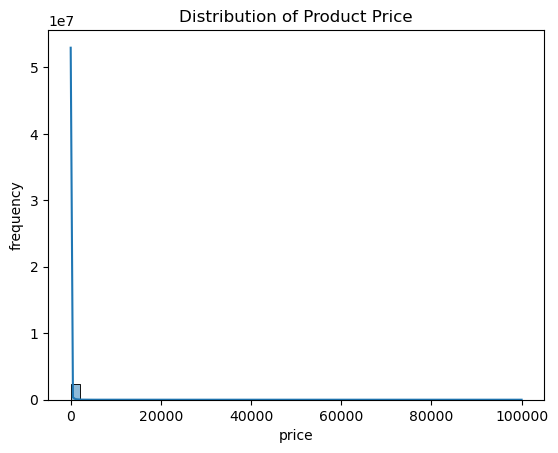

In [14]:
sns.histplot(df.price,kde=True,bins=50)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Distribution of Product Price')
plt.show()

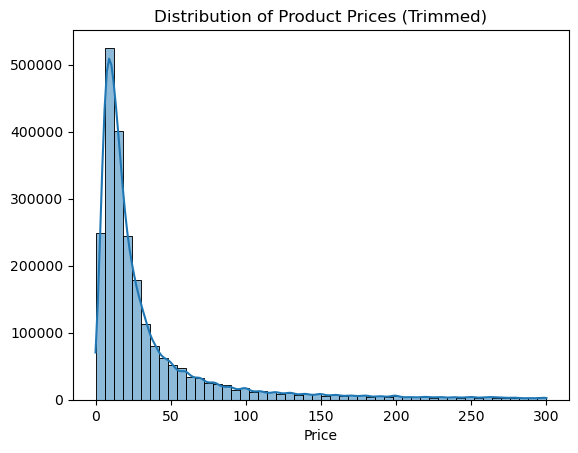

In [15]:
lower = 0  
upper= 300  

# Filter the data to remove outliers
trimmed_data = df[(df.price >= lower) & (df.price <= upper)]

sns.histplot(trimmed_data.price,kde=True, bins=50)  # Adjust the number of bins as needed
plt.title('Distribution of Product Prices (Trimmed)')
plt.xlabel('Price')
plt.ylabel('')
plt.show()

In [16]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


Text(0.5, 1.0, 'Box Plot of the Product Prices')

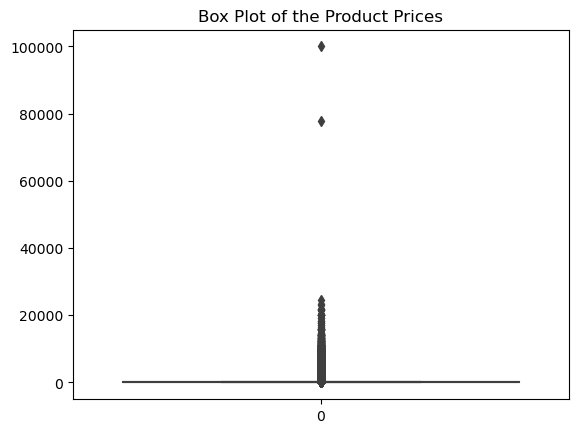

In [17]:
sns.boxplot(data = df.price)
plt.title('Box Plot of the Product Prices')


(0.0, 100.0)

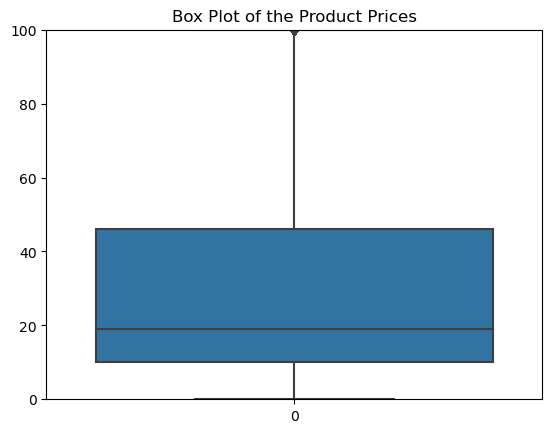

In [18]:
sns.boxplot(data = df.price)
plt.title('Box Plot of the Product Prices')
plt.ylim(0, 100)

## Part 3: Unpacking Product Ratings

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1. Measures of Centrality:

In [19]:
# Calculate the mean, median, and mode for the rating of products.

In [20]:
print("Stars of the products:\n")
print(f"Mean: {round(df.stars.mean(),4)}")
print(f"Median: {round(df.stars.median(),4)}")
print(f"Mode: {round(df.stars.mode(),4)}")

Stars of the products:

Mean: 2.1528
Median: 0.0
Mode: 0    0.0
Name: stars, dtype: float64


In [21]:
# How do customers generally rate products? Is there a common trend?

The common trend in customer ratings seems to be a skew towards lower ratings, with a notable proportion of products receiving a rating of 0.0.

### 2. Measures of Dispersion:

In [22]:
# Determine the variance, standard deviation, and interquartile range for product rating.

In [23]:
print("Stars of the products:\n")
print(f"Variance: {round(df.stars.var(),2)}")
print(f"Standard deviation: {round(df.stars.std(),2)}")
print(f"Range: {df.stars.min()} - {df.stars.max()}")
print(f"Interquantile Range: {df.stars.quantile(0.75)-df.stars.quantile(0.25)}")

Stars of the products:

Variance: 4.82
Standard deviation: 2.19
Range: 0.0 - 5.0
Interquantile Range: 4.4


In [24]:
#Are the ratings consistent, or is there a wide variation in customer feedback?

There is a wide variation in customer feedback, with ratings ranging across the entire spectrum from 0.0 to 5.0. While some products may receive consistently high or low ratings, there is significant variability in the ratings of other products.

### 3. Shape of the Distribution:

In [25]:
# Calculate the skewness and kurtosis for the rating column.

In [26]:
print("Stars of the products:\n")
print(f"Skew: {round(df.stars.skew(),2)}")
print(f"Kurtosis: {round(df.stars.kurtosis(),2)}")

Stars of the products:

Skew: 0.08
Kurtosis: -1.93


In [27]:
# Are the ratings normally distributed, or do they lean towards higher or lower values?

While the ratings may not be perfectly normally distributed, the slight positive skew suggests that they lean slightly towards higher values, indicating that customers tend to give somewhat higher ratings to the products on average. However, the distribution is relatively flat and lacks strong peaks or tails, indicating a less concentrated distribution of ratings.

### 4. Visualizations:

In [28]:
# Plot a histogram to visualize the distribution of product ratings. 
# Is there a specific rating that is more common?

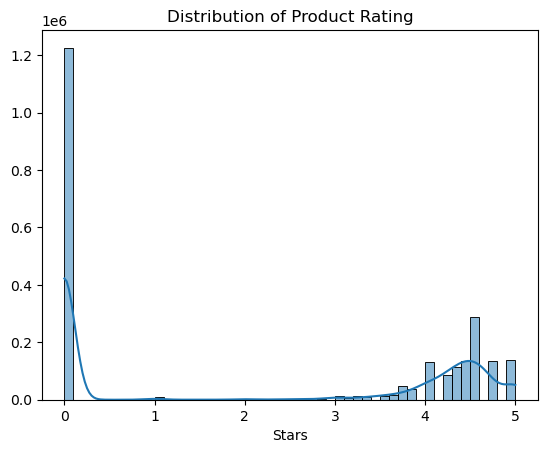

In [29]:
sns.histplot(df.stars, kde=True, bins=50)
plt.xlabel('Stars')
plt.ylabel('')
plt.title('Distribution of Product Rating')
plt.show()

Majority of the product received 0 stars and after that common rating is between 4 and 5. 

In [32]:
!ls -lh

total 940256
-rw-r--r--@ 1 negarmokhtari  staff   3.4K Apr 23 21:08 README.md
-rw-r--r--@ 1 negarmokhtari  staff   459M Nov  7  2023 amz_uk_price_prediction_dataset.csv
-rw-r--r--  1 negarmokhtari  staff   223K May 19 18:32 lab-eda-univariate.ipynb
